# HR Analytics Employee Attrition & Performance

In [409]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef
from scipy.stats import randint, skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score, matthews_corrcoef, auc, log_loss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## IBM has gathered information on employee satisfaction, income, seniority and some demographics. It includes the data of 1470 employees. To use a matrix structure, we changed the model to reflect the following data
| Name | Description |
| --- | --- |
| AGE | Numerical Value | 
| ATTRITION | Employee leaving the company (0=no, 1=yes) | 
| BUSINESS TRAVEL | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely) | 
| DAILY RATE | Numerical Value - Salary Level |
| DEPARTMENT | (1=HR, 2=R&D, 3=Sales) |
| DISTANCE FROM HOME | Numerical Value - THE DISTANCE FROM WORK TO HOME |
| EDUCATION | Numerical Value |
| EDUCATION FIELD | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL) |
| EMPLOYEE COUNT | Numerical Value |
| ENVIROMENT SATISFACTION | Numerical Value - SATISFACTION WITH THE ENVIROMENT |
| GENDER | (1=FEMALE, 2=MALE) |
| HOURLY RATE | HOURLY RATE |
| JOB INVOLVEMENT | Numerical Value - JOB INVOLVEMENT |
| JOB LEVEL | Numerical Value - LEVEL OF JOB |
| JOB ROLE | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION | Numerical Value - SATISFACTION WITH THE JOB |
| MARITAL STATUS | (1=DIVORCED, 2=MARRIED, 3=SINGLE) |
| MONTHLY INCOME | Numerical Value - MONTHLY SALARY |
| MONTHY RATE |	Numerical Value - MONTHY RATE |
| NUMCOMPANIES WORKED |	Numerical Value - NO. OF COMPANIES WORKED AT |
| OVER 18 |	(1=YES, 2=NO) |
| OVERTIME | (1=NO, 2=YES) |
| PERCENT SALARY HIKE |	Numerical Value - PERCENTAGE INCREASE IN SALARY |
| PERFORMANCE RATING | Numerical Value - ERFORMANCE RATING |
| RELATIONS SATISFACTION |	Numerical Value - RELATIONS SATISFACTION |
| STANDARD HOURS | Numerical Value - STANDARD HOURS |
| STOCK OPTIONS LEVEL |	Numerical Value - STOCK OPTIONS |
| TOTAL WORKING YEARS |	Numerical Value - TOTAL YEARS WORKED |
| TRAINING TIMES LAST YEAR | Numerical Value - HOURS SPENT TRAINING |
| WORK LIFE BALANCE | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE |
| YEARS AT COMPANY | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY |
| YEARS IN CURRENT ROLE | Numerical Value -YEARS IN CURRENT ROLE |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION |
| YEARS WITH CURRENT MANAGER |	Numerical Value - YEARS SPENT WITH CURRENT MANAGER |

In [152]:
df = pd.read_csv('IBM_HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Cleaning & Preprocessing

In [17]:
# How much your data is missing?
df.isnull().sum().sort_values(ascending=False)

YearsWithCurrManager        0
EmployeeCount               0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EmployeeNumber              0
EducationField              0
JobSatisfaction             0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
Attrition                   0
JobRole                     0
MaritalStatus               0
YearsSinceLastPromotion     0
StandardHours               0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
MonthlyIncome               0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
Over18                      0
NumCompaniesWorked          0
MonthlyRat

Jika dilihat dari data diatas dapat dilihat bahwa tidak ada data missing dari setiap column

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Data tersebut menunjukkan bahwa tipe data sudah sesuai denga data namun beberapa data bersifat categorical seperti data Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction dan WorkLifeBalance

Sehingga data tersbut perlu dilakukan One Hot Encoding apabila hendak dipakai untuk pemodelan.

In [153]:
# Mengubah type data menjadi obj karena data bersifat categorical
df['Education'] = df['Education'].astype(str)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(str)
df['JobRole'] = df['JobRole'].astype(str)
df['JobInvolvement'] = df['JobInvolvement'].astype(str)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(str)
df['PerformanceRating'] = df['PerformanceRating'].astype(str)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(str)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(str)
df['JobRole'] = df['JobRole'].astype(str)
# Mengubah data yes no menjadi 1 dan 0
df.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)
#df.OverTime.replace(('Yes', 'No'), (1, 0), inplace=True)
#df.Education.replace(('Below College', 'College', 'Bachelor', 'Master', 'Doctor'), (1, 2, 3, 4, 5), inplace=True)
#df.EnvironmentSatisfaction.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
#df.JobInvolvement.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
#df.JobSatisfaction.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
#df.PerformanceRating.replace(('Low', 'Good', 'Excellent', 'Outstanding'), (1, 2, 3, 4), inplace=True)
#df.RelationshipSatisfaction.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
#df.RelationshipSatisfaction.replace(('Bad', 'Good', 'Better', 'Best'), (1, 2, 3, 4), inplace=True)
#df.JobRole.replace(('Laboratory Technician', 'Sales Executive', 'Research Scientist', 'Sales Representative', "Human Resources", 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Director' ), (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [53]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [20]:
# Transform categorical data into dummies
#dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
#data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 137 entries, Age to YearsWithCurrManager_17
dtypes: int64(10), uint8(127)
memory usage: 297.3 KB


In [307]:
# Transform categorical data into dummies
data_dum = pd.get_dummies(df, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   MonthlyIncome                      1470 non-null   int64
 9   MonthlyRate                        1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  StandardHours       

In [308]:
pd.set_option('display.max_columns', None)
data_dum

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
1,49,0,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
3,33,0,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
4,27,0,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,1,2061,41,2,2571,12290,4,17,80,1,17,3,5,2,0,3,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
1466,39,0,613,6,1,2062,42,3,9991,21457,4,15,80,1,9,5,7,7,1,7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,1,2064,87,2,6142,5174,1,20,80,1,6,0,6,2,0,3,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0
1468,49,0,1023,2,1,2065,63,2,5390,13243,2,14,80,0,17,3,9,6,0,8,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0


In [158]:
print(data_dum.shape)

# Remove duplicate Features
data_dum = data_dum.T.drop_duplicates()
data_dum = data_dum.T

# Remove Duplicate Rows
data_dum.drop_duplicates(inplace=True)

print(data_dum.shape)

(1470, 61)
(1470, 61)


In [159]:
data_dum.shape

(1470, 61)

In [160]:
data_dum

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
1,49,0,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
3,33,0,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
4,27,0,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,1,2061,41,2,2571,12290,4,17,80,1,17,3,5,2,0,3,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
1466,39,0,613,6,1,2062,42,3,9991,21457,4,15,80,1,9,5,7,7,1,7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,1,2064,87,2,6142,5174,1,20,80,1,6,0,6,2,0,3,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0
1468,49,0,1023,2,1,2065,63,2,5390,13243,2,14,80,0,17,3,9,6,0,8,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0


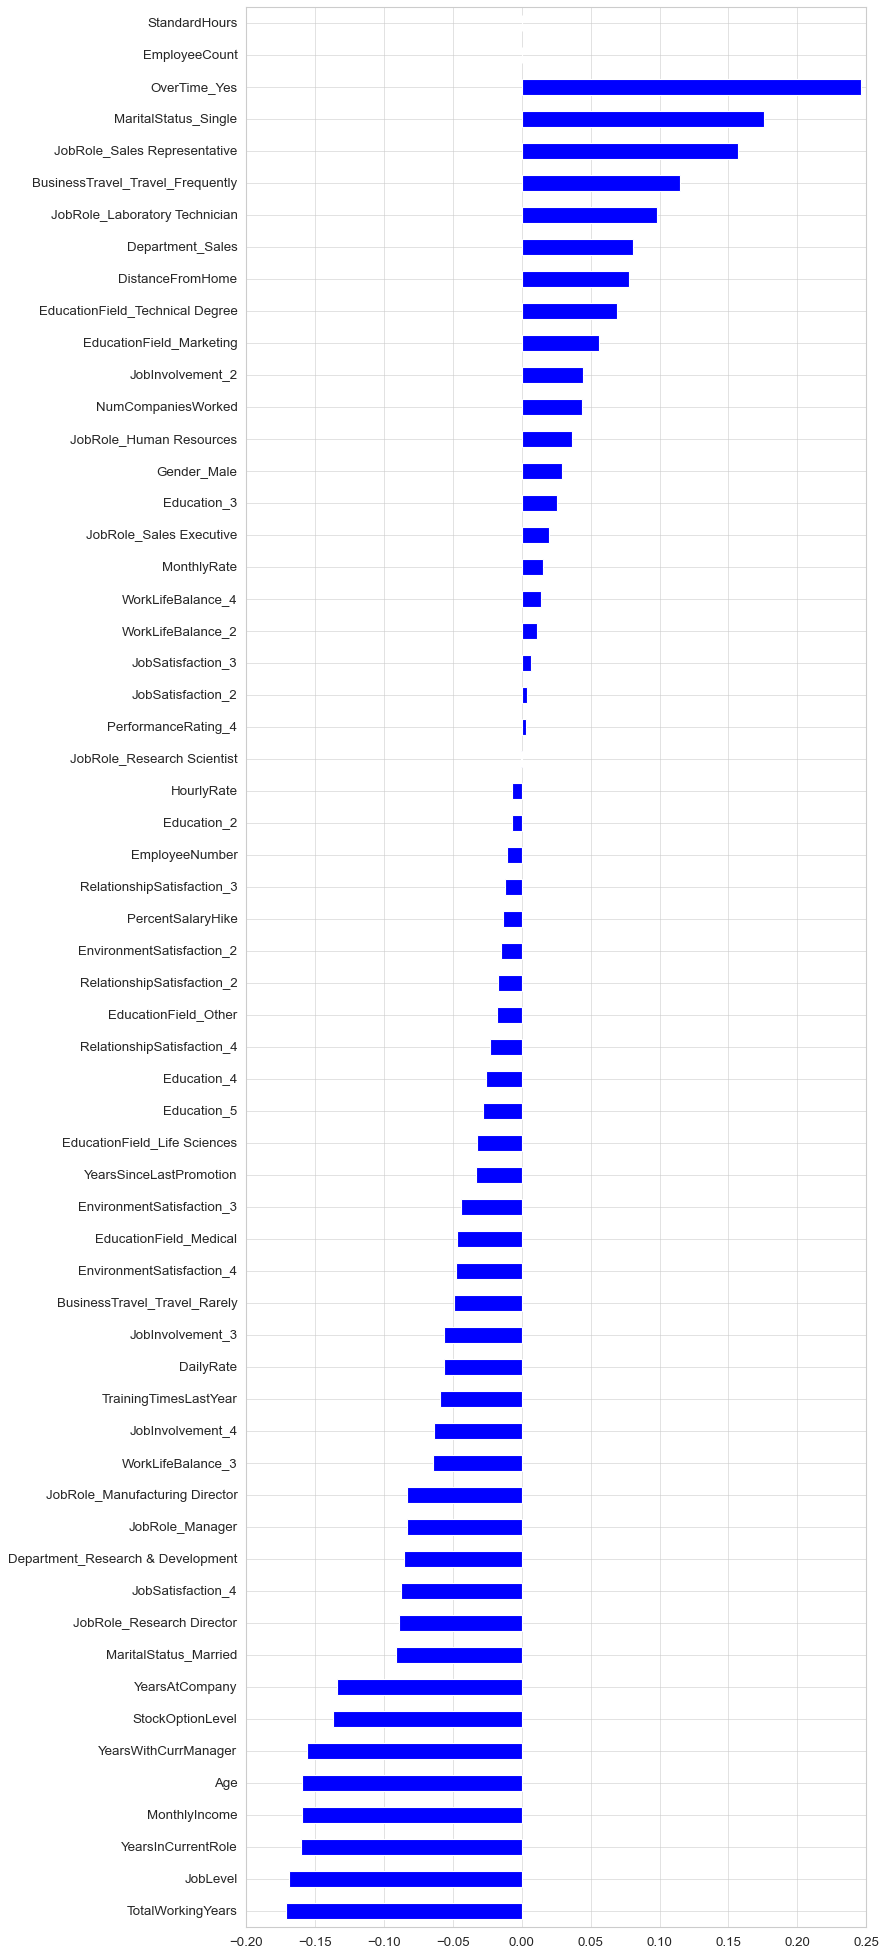

In [309]:
plt.style.use('classic')
sns.set_style("whitegrid")
data_dum.drop('Attrition', axis=1).corrwith(data_dum.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

Data di atas menunjukan hubungan nilai korelasi setiap column dengan column Atteration.<br>

Dimana **Overtime** memiliki korelasi positif yang paling tinggi yang berarti ketika tingkat lembur tinggi maka kemungkinan tingkat resign juga akan meningkat. <br>

Sedangkan **TotalWorkingYears** memiliki korelasi negatif yang paling rendah yang berarti ketika total waktu bekerja dalam tahun semakin rendah maka kemungkinan tingkat resign semakin tinggi. <br>

Dan **StandardHour**, dan **EmployeeCount** memiliki zero correlation yang berarti tidak memiliki hubungan dengan tingkat resign.

## EDA (Exploratory Data Analysis)

In [59]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [60]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [455]:
attrition = df[(df['Attrition'] == 1)]
no_attrition = df[(df['Attrition'] == 0)]

#------------COUNT-----------------------
fig = go.Figure(data=go.Bar(x = (len(attrition), len(no_attrition),  
                                 y= ['Yes_attrition', 'No_attrition'])), 
             orientation = 'h', opacity = 0.8,
             layout_title_text="Count of attrition variable")

#layout = dict(title =  'Count of attrition variable')
                    
#fig = dict(data = [trace], layout=layout)
fig.show()

#------------PERCENTAGE-------------------
#trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
              # textfont=dict(size=15), opacity = 0.8,
              # marker=dict(colors=['lightskyblue','gold'], 
                          # line=dict(color='#000000', width=1.5)))


#layout = dict(title =  'Distribution of attrition variable')
           
#fig = dict(data = [trace], layout=layout)
#py.iplot(fig)

TypeError: invalid Figure property: orientation

Dari 1470 karyawan ada 237 karyawan atau 16% karyawan yang melakukan attrition atau resign. Sekarang kita akan mencari tau faktor yang menyebabkan attrition tersebut.

In [107]:
#Attrition yes = 1, no =0
df[['OverTime', 'Attrition']].reset_index().groupby(['OverTime', 'Attrition']).count()

index
OverTime Attrition       
No       0            944
         1            110
Yes      0            289
         1            127

### Gender

Diantara laki-laki dan perempuan makah yang paling banyak melakukan **Attrition** dan apa penyebabnya?

In [187]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['Gender'].value_counts().keys().tolist(),
       y=tmp1['Gender'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['Gender'].value_counts().keys().tolist(),
       y=tmp2['Gender'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Gender Corr = " + str(df['Attrition'].corr(data['Gender_Male'])),
              xaxis= dict(title="Gender"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
py.iplot(fig)

In [295]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['Gender'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['Gender'].value_counts()

fig.add_trace(go.Pie(labels = ["Male", "Female"], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Male", "Female"], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition Gender')
           
#fig = dict(data = [trace, trace2], layout=layout)
py.iplot(fig)

Berdasarkan data Barplot **Gender** dapat di lihat bahwa **Male** lebih memiliki kemungkinan untuk melakukan **Yes_attrition** dan **No_attrition** dibanding perempuan. 

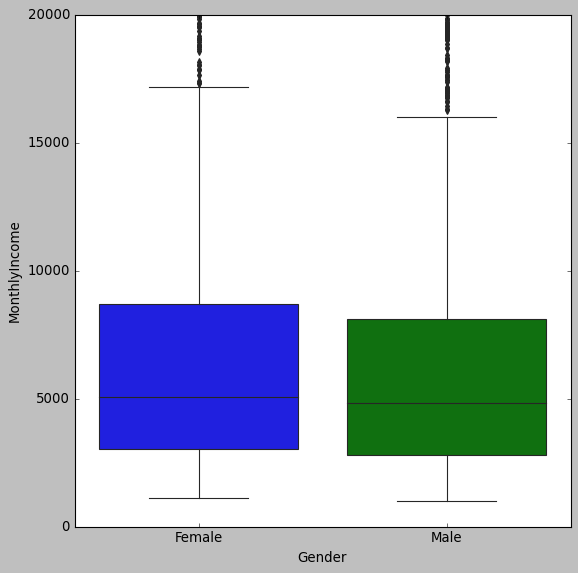

In [205]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Gender', y = 'MonthlyIncome', data = df)

Dari data diatas bisa menunjukan jika rata-rata **MonthlyIncome** **Male** lebih rendah dari pada **Female**. Mungkin ini bisa menjadi salah satu alasan dimanana **Male** memiliki tingkat **Attrition** yang lebih besar

### JobRole

Mencari tahu JobRole manakah yang mempunyai tingkat **Attrition** tertinggi dan apa alasannya?

In [186]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['JobRole'].value_counts().keys().tolist(),
       y=tmp1['JobRole'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['JobRole'].value_counts().keys().tolist(),
       y=tmp2['JobRole'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "JobRole",
              xaxis= dict(title="JobRole"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
py.iplot(fig)

In [298]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['JobRole'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['JobRole'].value_counts()

fig.add_trace(go.Pie(labels = ["Laboratory Technician", "Sales Executive", 
                               "Research Scientist", 'Sales Representative', 
                               'Human Resources', 'Manufacturing Director', 
                               'Healthcare Representative', 'Manager', 
                               'Research Director'],
                     values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Laboratory Technician", "Sales Executive", 
                               "Research Scientist", 'Sales Representative', 
                               'Human Resources', 'Manufacturing Director', 
                               'Healthcare Representative', 'Manager', 
                               'Research Director'],
                     values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi JobRole')
           
#fig = dict(data = [trace, trace2], layout=layout)
py.iplot(fig)

Data diatas menjelaskan bahwa job role **Laboratory Technician** adalah Job role dengan tingkat yes_attrition tertinggi dibandingkan dengan job role lainnya. <br>

Sedangkan Research Director adalah JobRole **Research Director** adalah job role dengan tingkat yes_attrition terendah dibandingkan job role lainnya.

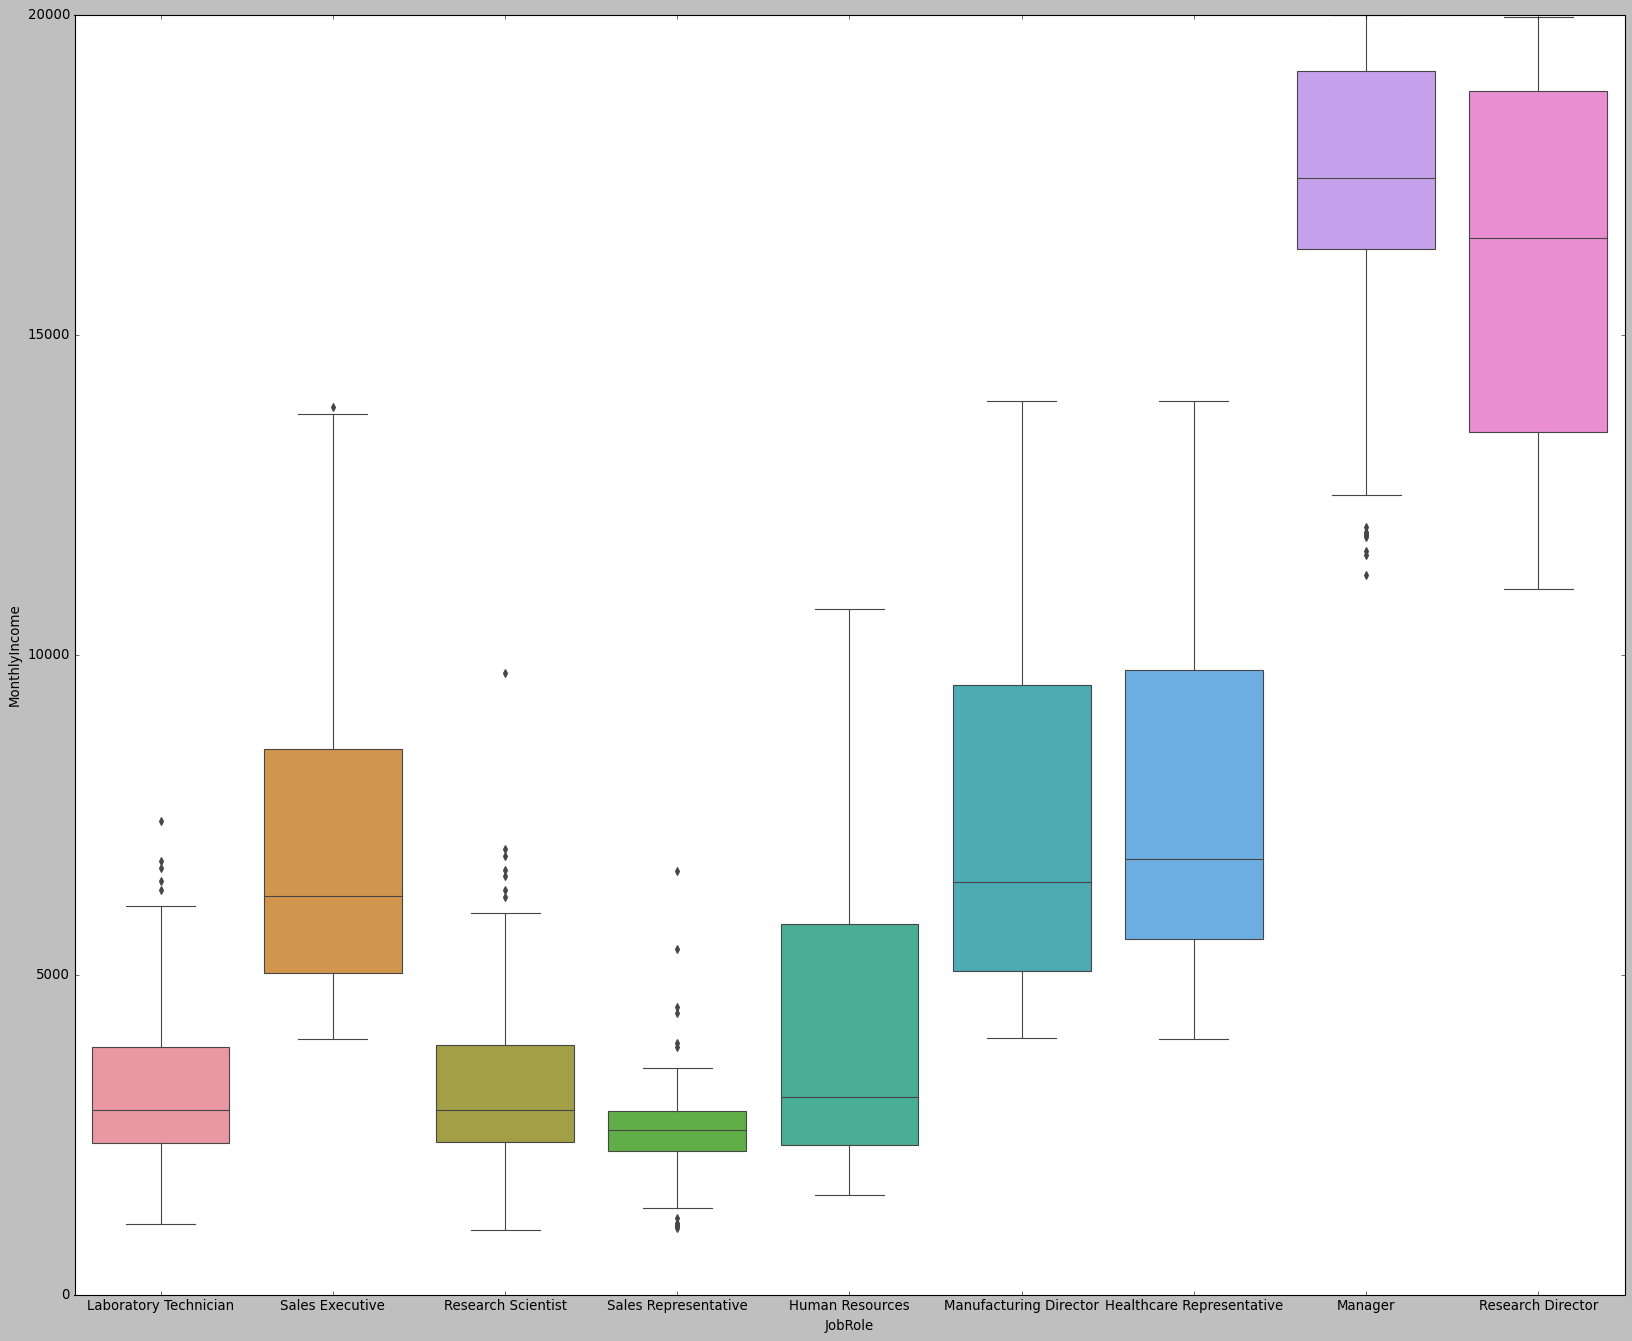

In [240]:
plt.figure(figsize = (25,20))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome', data = df,
            order=["Laboratory Technician", "Sales Executive", 
                   "Research Scientist", 'Sales Representative', 
                   'Human Resources', 'Manufacturing Director', 
                   'Healthcare Representative', 'Manager', 
                   'Research Director'])

**Laboratory Technician** Memiliki **MonthlyIncome** yang lebih kecil dari pada JobRole lainnya 

### JobLevel

Pertanyaan yang mau di highlight 

In [221]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['JobLevel'].value_counts().keys().tolist(),
       y=tmp1['JobLevel'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['JobLevel'].value_counts().keys().tolist(),
       y=tmp2['JobLevel'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "JobLevel",
              xaxis= dict(title="JobLevel"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
py.iplot(fig)

In [292]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['JobLevel'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['JobLevel'].value_counts()

fig.add_trace(go.Pie(labels = [1, 2, 3, 4, 5], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = [1, 2, 3, 4, 5], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition JobLevel')
           
#fig = dict(data = [trace, trace2], layout=layout)
py.iplot(fig)

1 = Entry level, 2 = Intermediate, 3 = Experienced, 4 = Advanced, 5 = Expert 

Data diatas menunjukan bahwa Entry level memiliki tingkat **Attrition** yang lebih tinggi.

### OverTime

Melihat data bagaimana tingkat corr **OverTime** pada **Attrition**

In [110]:
#Attrition yes = 1, no =0
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['OverTime'].value_counts().keys().tolist(),
       y=tmp1['OverTime'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['OverTime'].value_counts().keys().tolist(),
       y=tmp2['OverTime'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Over Time Corr = " + str(df['Attrition'].corr(data['OverTime_Yes'])),
              xaxis= dict(title="OverTime"), 
              yaxis=dict(title='Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= ''))
              
fig = go.Figure(data=[bar1, bar2], layout=layout)
py.iplot(fig)

In [300]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['OverTime'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['OverTime'].value_counts()

fig.add_trace(go.Pie(labels = ["Yes_OverTime", "No_OverTime"], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Yes_OverTime", "No_OverTime"], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition OverTime')
           
#fig = dict(data = [trace, trace2], layout=layout)
py.iplot(fig)

Data diatas menunjukan dengan tidak lembur maka besar kemungkinan bahwa employee tidak akan melakukan resign. Tetapi sebaliknya jika pegawai lembur maka dapat menaikan tingkat resign walaupun tidak begitu besar. data di atas juga mendukung hypothesis korelasi positif dari **OverTime**

### Marital Status

Bagaimana status perkawinan mempengaruhi tingkat **Attrition**?

In [191]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['MaritalStatus'].value_counts().keys().tolist(),
       y=tmp1['MaritalStatus'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['MaritalStatus'].value_counts().keys().tolist(),
       y=tmp2['MaritalStatus'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "MaritalStatus",
              xaxis= dict(title="MaritalStatus"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
py.iplot(fig)

In [301]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['MaritalStatus'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['MaritalStatus'].value_counts()

fig.add_trace(go.Pie(labels = ["Single", "Married", "Divorced"], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Single", "Married", "Divorced"], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition MaritalStatus')
           
#fig = dict(data = [trace, trace2], layout=layout)
py.iplot(fig)

Data diatas menunjukan bahwa employee dengan status single memiliki kecendrungan **Attrition** yang lebih besar dari employee yang **Married** dan **Divorced**

### TotalWorkingYears

Bagaimana **TotalWorkingYears** mempengaruhi **Attrition**?

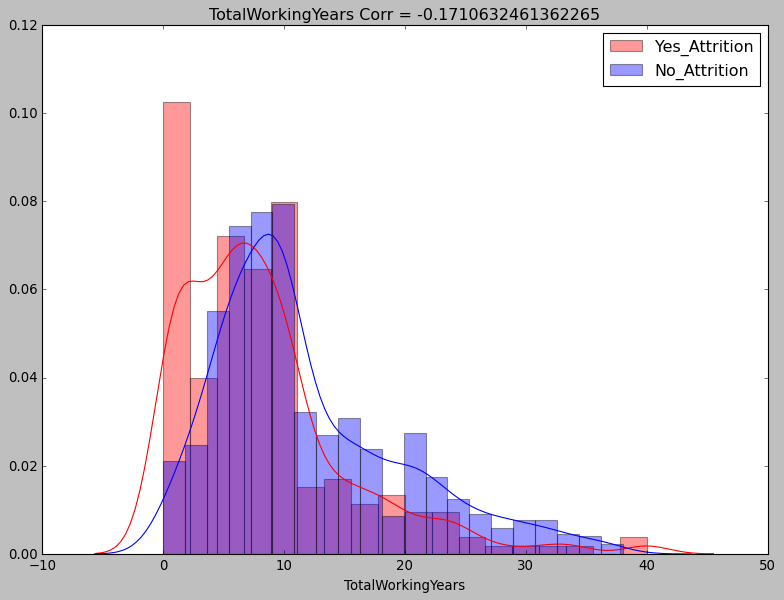

In [61]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot((df[df['Attrition'] == 1]['TotalWorkingYears']), label = 'Yes_Attrition', ax=ax, color='r')
sns.distplot((df[df['Attrition'] == 0 ]['TotalWorkingYears']), label = 'No_Attrition', ax=ax).set_title(("TotalWorkingYears Corr = " + str(df['Attrition'].corr(df['TotalWorkingYears']))))
plt.style.use('classic')
plt.legend()

In [182]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed
yes_attrition = skew(df[df['Attrition'] == 1]['TotalWorkingYears'])
no_attrition = skew(df[df['Attrition'] == 0]['TotalWorkingYears'])

print("distribusi data TotalWorkingYears pada yes_attrition memiliki nilai skewed " + str(yes_attrition))
print("distribusi data TotalWorkingYears pada no_attrition memiliki nilai skewed " + str(no_attrition))

distribusi data TotalWorkingYears pada yes_attrition memiliki nilai skewed 1.6774541418299111
distribusi data TotalWorkingYears pada no_attrition memiliki nilai skewed 1.0656247951885347


Dari data kita bisa melihat bahwa jika waktu bekerja karyawan belum begitu lama memungkinkan adanya kemungkinan bahwa employee akan melakukan resign atau attrition. hal ini juga mendukung dari negatif correlation antara TotalWorkingYears dan Attrition.

### MonthlyIncome

Bagaimana **MonthlyIncome** mempengaruhi **Attrition**?

(0.0, 20000.0)

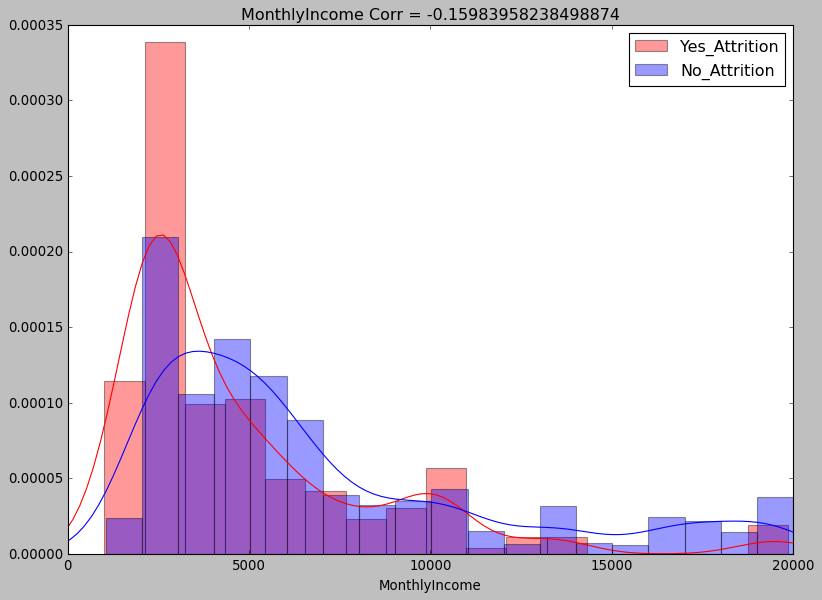

In [198]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot((df[df['Attrition'] == 1]['MonthlyIncome']), label = 'Yes_Attrition', ax=ax, color='r')
sns.distplot((df[df['Attrition'] == 0 ]['MonthlyIncome']), label = 'No_Attrition', ax=ax).set_title(("MonthlyIncome Corr = " + str(df['Attrition'].corr(df['MonthlyIncome']))))
plt.style.use('classic')
plt.legend()
plt.xlim(0, 20000)

data ini menunjukan bahwa employee dengan **MonthlyIncome** 2000 - 3000 memiliki tingkat **Attrition** yang lebih besar. <br>

Sedangkan employee dengan **MonthlyIncome** diatas 3000 cenderung memiliki tingkat **Attrition** yang lemah

### Conclusion

Setelah melakukan EDA kita mengetahui bahwa Gender, Jobrole, OverTime, MaritalStatus, JobLevel, TotalWorking, dan MonthlyIncome memiliki hubungan dan pengaruh kepada Attrition 
<ol>
<li>Dari Gender kita bisa melihat bahwa laki-laki memiliki tingkat Attrition yang lebih besar dibandingkan perempuan. Hal ini mungkin bisa disebabkan oleh MonthlyIncome Perempuan yang lebih besar dibanding laki-laki </li>
<li>Dari JobRole kita bisa melihat bahwa Laboratory Technician memiliki tingkat Attrition yang lebih besar dibanding job role yang lain. hal ini mungkin bisa disebabkan oleh Laboratory Technician memiliki Monthly Income yang lebih kecil dibanding JobRole lainnya</li>
<li>Dari OverTime kita bisa melihat bahwa dengan tidak lembur maka besar kemungkinan bahwa employee tidak akan melakukan resign. Tetapi sebaliknya jika pegawai lembur maka dapat menaikan tingkat resign walaupun tidak begitu besar. </li>
<li>Dari Marital Status kita dapat menyimpulkan bahwa employee yang masih single memiliki tingkat Attrition yang lebih tinggi. Sedangkan employee yang Married kecil kemungkinan untuk Attrition</li>
<li>Dari Job Level kita bisa Ambil kesimpulan bahwa employee entry level memiliki kemungkinan untuk resign yang lebih tinggi. </li>
<li>Total Working Years menunjukan bahwa jika employee memiliki total kerja 1-2 tahun masih memiliki kemungkinan resign yang besar. ini juga mendukung kesimpulan JobLevel</li>
<li>Monthly Income memiliki pengaruh yan besar kepada Attrition dimana employee yang memiliki Monthly Income di range 1000 - 3000 memiliki tingkat Attrition yang tinggi</li>
</ol>

## Machine Learning Models 

### Random Forest

In [311]:
#Splitting Data into Train and Test sets
target = 'Attrition'

X_train, X_test, y_train, y_test = train_test_split(
    data_dum.drop([target], axis=1), 
    data_dum[target], 
    random_state=101, test_size=0.3)

In [425]:
# Random Forest Model Building

rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fit the model
rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

# Classification Reports 
print("Random Forest")
print(classification_report(y_test, predict_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.67      0.11      0.20        70

    accuracy                           0.85       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.83      0.85      0.80       441



In [320]:
# Scatter plot 
trace = go.Scatter(
    y = rf_model.feature_importances_,
    x = data_dum.drop([target], axis=1).columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_model.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = data_dum.drop([target], axis=1).columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

#### Feature Ranking via the Random Forest
Dari hasil feature important kita bisa melihat bahwa feature yang memberikan pengaruh besar kepada model **Random Forest** adalah **Monthly Income**, **Age**, **OverTime**, dan **TotalWorkingYears**

### KNN (K Nearest Neighbors)

In [347]:
#Splitting Data into Train and Test sets
target = 'Attrition'

X_train, X_test, y_train, y_test = train_test_split(
    data_dum.drop([target], axis=1), 
    data_dum[target], 
    random_state=101, test_size=0.3)

scaler = StandardScaler()

In [352]:
scaler.fit_transform(X_train)

array([[-1.17805731,  0.91629505, -0.52023148, ..., -0.55302583,
         0.79745222, -0.34066415],
       [ 2.14978212, -1.43403818, -0.15172423, ..., -0.55302583,
         0.79745222, -0.34066415],
       [-0.84527337, -0.79081483,  0.09394726, ..., -0.55302583,
         0.79745222, -0.34066415],
       ...,
       [-0.0687775 ,  0.60813481,  0.46245451, ..., -0.55302583,
         0.79745222, -0.34066415],
       [-1.17805731,  0.7426492 , -0.39739573, ..., -0.55302583,
         0.79745222, -0.34066415],
       [-0.40156145, -1.57833544, -0.88873873, ..., -0.55302583,
         0.79745222, -0.34066415]])

In [424]:
# Random Forest Model Building

KNN_model = KNeighborsClassifier(n_neighbors=1)

# fit the model
KNN_model.fit(X_train, y_train)
#Predict Model
predict_knn = KNN_model.predict(X_test)

# Classification Reports 
print("KNN")
print(classification_report(y_test, predict_knn))

KNN
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       371
           1       0.23      0.23      0.23        70

    accuracy                           0.76       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.76      0.76      0.76       441



### Choosing a K Value

In [371]:
error_rate = []

# Will take some time
for i in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

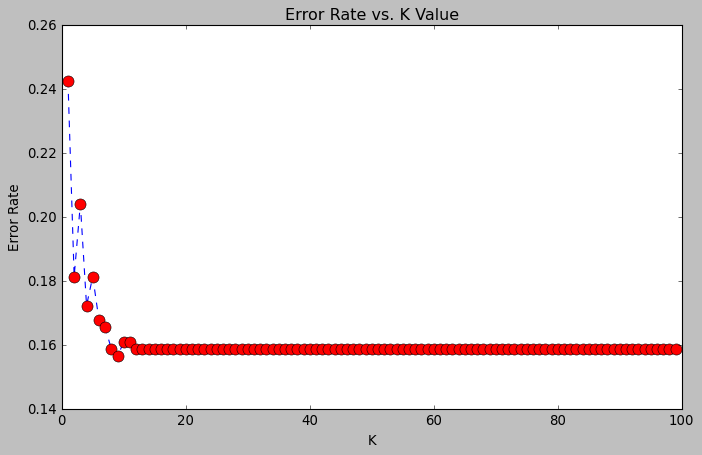

In [374]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.style.use("classic")

In [380]:
# KNN Model Building

KNN_model = KNeighborsClassifier(n_neighbors=1)

# fit the model
KNN_model.fit(X_train, y_train)
#Predict Model
predict_knn = KNN_model.predict(X_test)

# Classification Reports 
print("KNN = 1")
print(classification_report(y_test, predict_knn))

KNN = 1
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       371
           1       0.23      0.23      0.23        70

    accuracy                           0.76       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.76      0.76      0.76       441



In [385]:
# KNN Model Building

KNN_model = KNeighborsClassifier(n_neighbors=20)

# fit the model
KNN_model.fit(X_train, y_train)
#Predict Model
predict_knn = KNN_model.predict(X_test)

# Classification Reports 
print("KNN = 20")
print(classification_report(y_test, predict_knn))

KNN = 20
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



C:\Users\AIAAUser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Gradient Boosting

In [387]:
#Splitting Data into Train and Test sets
target = 'Attrition'

X_train, X_test, y_train, y_test = train_test_split(
    data_dum.drop([target], axis=1), 
    data_dum[target], 
    random_state=101, test_size=0.3)

In [423]:
# Random Forest Model Building

gb = GradientBoostingClassifier(learning_rate = 0.01, subsample = 0.5, n_estimators = 100)
# fit the model
gb.fit(X_train, y_train)
#Predict Model
gb_predict = gb.predict(X_test)

# Classification Reports 
print("Gradient Boosting")
print(classification_report(y_test, gb_predict))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.86      0.09      0.16        70

    accuracy                           0.85       441
   macro avg       0.85      0.54      0.54       441
weighted avg       0.85      0.85      0.80       441



In [393]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = data_dum.drop([target], axis=1).columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = data_dum.drop([target], axis=1).columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boost Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

#### Feature Ranking via the Gradient Boost
Dari hasil feature important kita bisa melihat bahwa feature yang memberikan pengaruh besar kepada model **Gradient Boost** adalah  **OverTime**, **Monthly Income**, **Age**

### Conclusion

In [426]:
# Random Forest
print("Random Forest")
print(classification_report(y_test, predict_rf))
print('\n')

# KNN 
print("KNN K= 20")
print(classification_report(y_test, predict_knn))
print('\n')

# Gradient Boost
print("Gradient Boosting")
print(classification_report(y_test, gb_predict))

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.67      0.11      0.20        70

    accuracy                           0.85       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.83      0.85      0.80       441



KNN K= 20
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       371
           1       0.23      0.23      0.23        70

    accuracy                           0.76       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.76      0.76      0.76       441



Gradient Boosting
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.86      0.09      0.16        70

    accuracy                           0.85       441
   macro avg       0.85      0.54      0.54       441
weighted avg       0.85     

Kita memiliki data **Attrition** yang imbalance dari sini kita ingin membandingkan **Recall** yang dihasilkan dari setiap model. Dimana **Recall** menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. **recall** digunakan ketika kita memiliki imbalance dataset. <br>

**Gradient Boosting** memiliki nilai **recall** yang paling tinggi yaitu 100% oleh karena itu untuk kasus ini kita memilih **Gradient Boost** sebagai model.

### Model Evaluation

In [427]:
predictions_proba = gb.predict_proba(X_test)
predictions_proba

array([[0.87965543, 0.12034457],
       [0.8776476 , 0.1223524 ],
       [0.90009088, 0.09990912],
       [0.71040391, 0.28959609],
       [0.90182434, 0.09817566],
       [0.84652386, 0.15347614],
       [0.87176074, 0.12823926],
       [0.89865277, 0.10134723],
       [0.71806565, 0.28193435],
       [0.88725679, 0.11274321],
       [0.90336112, 0.09663888],
       [0.62482911, 0.37517089],
       [0.89691999, 0.10308001],
       [0.86463944, 0.13536056],
       [0.88627178, 0.11372822],
       [0.89712369, 0.10287631],
       [0.8537432 , 0.1462568 ],
       [0.86572959, 0.13427041],
       [0.82024276, 0.17975724],
       [0.82992106, 0.17007894],
       [0.8883067 , 0.1116933 ],
       [0.88844821, 0.11155179],
       [0.86517041, 0.13482959],
       [0.85429858, 0.14570142],
       [0.90626474, 0.09373526],
       [0.86768109, 0.13231891],
       [0.893639  , 0.106361  ],
       [0.74640402, 0.25359598],
       [0.81968038, 0.18031962],
       [0.82678699, 0.17321301],
       [0.

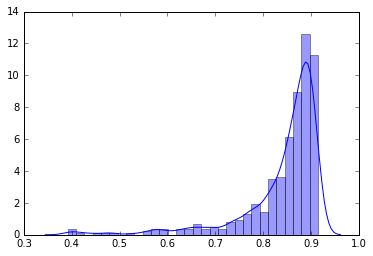

In [428]:
sns.distplot(predictions_proba[:,0])

In [429]:
df_tmp = pd.DataFrame()
df_tmp['y_test'] = y_test
df_tmp['pred_score'] = predictions_proba[:,0]
df_tmp

,y_test,pred_score
353,0,0.879655
812,0,0.877648
449,0,0.900091
1168,0,0.710404
969,0,0.901824
...,...,...
1293,0,0.869761
761,1,0.883046
870,0,0.868378
959,0,0.892187


In [434]:
for enum, i in enumerate(np.linspace(0,1,11)):
    df_tmp['y_pred_{}'.format(enum)] = df_tmp['pred_score'].apply(
        lambda x: 1 if x < i else 0)

In [435]:
df_tmp

,y_test,pred_score,y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9,y_pred_10
353,0,0.879655,0,0,0,0,0,0,0,0,0,1,1
812,0,0.877648,0,0,0,0,0,0,0,0,0,1,1
449,0,0.900091,0,0,0,0,0,0,0,0,0,0,1
1168,0,0.710404,0,0,0,0,0,0,0,0,1,1,1
969,0,0.901824,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0.869761,0,0,0,0,0,0,0,0,0,1,1
761,1,0.883046,0,0,0,0,0,0,0,0,0,1,1
870,0,0.868378,0,0,0,0,0,0,0,0,0,1,1
959,0,0.892187,0,0,0,0,0,0,0,0,0,1,1


In [436]:
for i in range(0,11):
    tp = len(df_tmp[(df_tmp['y_test'] == 1) & (df_tmp['y_pred_{}'.format(i)] == 1)])
    fn = len(df_tmp[(df_tmp['y_test'] == 1) & (df_tmp['y_pred_{}'.format(i)] == 0)])
    fp = len(df_tmp[(df_tmp['y_test'] == 0) & (df_tmp['y_pred_{}'.format(i)] == 1)])
    recall = tp/(fn + tp)
    errors = fn + fp
    print('recall treshold ke-{} adalah {} dengan errors {}'.format(i,recall,errors))

recall treshold ke-0 adalah 0.0 dengan errors 70
recall treshold ke-1 adalah 0.0 dengan errors 70
recall treshold ke-2 adalah 0.0 dengan errors 70
recall treshold ke-3 adalah 0.0 dengan errors 70
recall treshold ke-4 adalah 0.014285714285714285 dengan errors 69
recall treshold ke-5 adalah 0.08571428571428572 dengan errors 65
recall treshold ke-6 adalah 0.12857142857142856 dengan errors 67
recall treshold ke-7 adalah 0.2714285714285714 dengan errors 66
recall treshold ke-8 adalah 0.45714285714285713 dengan errors 86
recall treshold ke-9 adalah 0.9428571428571428 dengan errors 312
recall treshold ke-10 adalah 1.0 dengan errors 371


In [443]:
predictions = gb.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [444]:
PredictProb = gb.predict_proba(X_test)
PredictProb

array([[0.87965543, 0.12034457],
       [0.8776476 , 0.1223524 ],
       [0.90009088, 0.09990912],
       [0.71040391, 0.28959609],
       [0.90182434, 0.09817566],
       [0.84652386, 0.15347614],
       [0.87176074, 0.12823926],
       [0.89865277, 0.10134723],
       [0.71806565, 0.28193435],
       [0.88725679, 0.11274321],
       [0.90336112, 0.09663888],
       [0.62482911, 0.37517089],
       [0.89691999, 0.10308001],
       [0.86463944, 0.13536056],
       [0.88627178, 0.11372822],
       [0.89712369, 0.10287631],
       [0.8537432 , 0.1462568 ],
       [0.86572959, 0.13427041],
       [0.82024276, 0.17975724],
       [0.82992106, 0.17007894],
       [0.8883067 , 0.1116933 ],
       [0.88844821, 0.11155179],
       [0.86517041, 0.13482959],
       [0.85429858, 0.14570142],
       [0.90626474, 0.09373526],
       [0.86768109, 0.13231891],
       [0.893639  , 0.106361  ],
       [0.74640402, 0.25359598],
       [0.81968038, 0.18031962],
       [0.82678699, 0.17321301],
       [0.

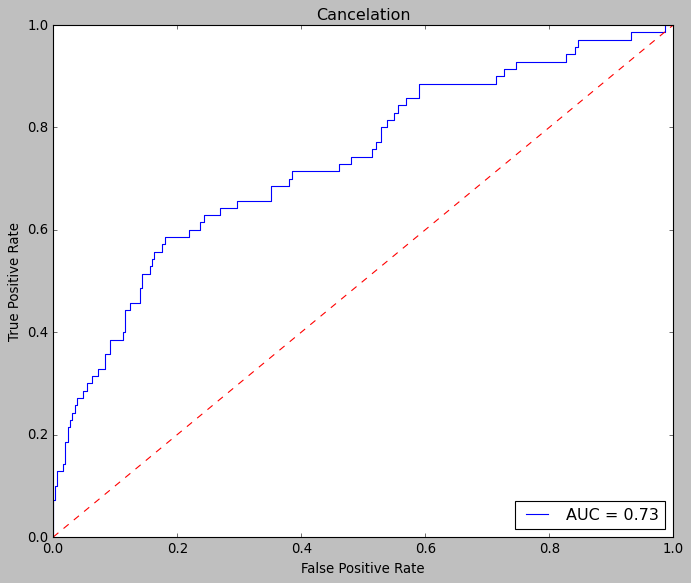

In [445]:
preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.style.use('classic')
plt.figure(figsize=(10,8))
plt.title('Cancelation')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
